<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


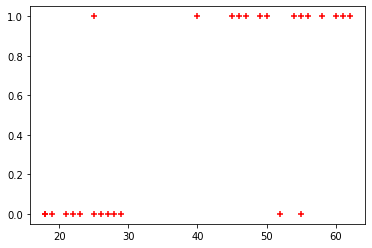

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
7,60
6,55
14,49
25,54
15,55
9,61


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
7,60
6,55
14,49
25,54
15,55
9,61


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.02637048, 0.97362952],
       [0.05670989, 0.94329011],
       [0.13533452, 0.86466548],
       [0.06586872, 0.93413128],
       [0.05670989, 0.94329011],
       [0.02257105, 0.97742895]])

In [12]:
model.score(X_test,y_test)

0.8333333333333334

In [13]:
y_predicted

array([1, 1, 1, 1, 1, 1])

In [14]:
X_test

,age
7,60
6,55
14,49
25,54
15,55
9,61


**model.coef_ indicates value of m in y=m*x + b equation**

In [15]:
model.coef_

array([[0.15947204]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [16]:
model.intercept_

array([-5.95953704])

**Lets defined sigmoid function now and do the math with hand**

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [19]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [20]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model